# HASS CONSULTANCY - PREDICTION OF HOUSE PRICE

## 1. Defining the Question

###  Specifying the Question


> I have been working for Hass Consulting Company, which is a real estate leader with over 25 years of experience, as a Data Scientist. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. I will then create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 





###  Defining the Metric for Success

The metric for success for this project include:

* Identifying the features that have more effect to the independent variable

* Identifying the best parameters to use to maximize on accuracy

* Create a model that will have the most accurate prediction and the lowest MSE 

###  Understanding the context 

> Hass Consult is an award winning real estate leader with over 25 years of experience. We offer a personalized touch and keen attention to client needs, we have curved out a niche in the market as the trendsetters and benchmark for the real estate industry, and continue to bring a global touch to the Kenyan market emerging as a real estate market leader in this developing country where real estate still remains one of the most lucrative investments.

###  Recording the Experimental Design

> The Dataset in this project is fifa.ranking.csv and results.csv

> The design for this project will include:

>> * Perform your EDA
>> * Perform any necessary feature engineering
>> * Check of multicollinearity
>> * Multiple Linear Regression
>> * Quantile Regression
>> * Ridge Regression
>> * Lasso Regression
>> * Elastic Net Regression
>> * Cross-validate the model
>> * Compute MSE
>> * Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

###  Data Relevance

The relavance of our data will be answered by the following questions.

* How accurate is the data at predicting the outcome of the games?

* Was the dataset sufficient?

* Was the data biased?

* Is the data source a reliable source?

## 2. Reading the Data

In [0]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.linear_model import ElasticNet
from scipy import stats
from sklearn.preprocessing import StandardScaler
import scipy as sp

In [0]:
# Loading the Dataset
# Dataset url = http://bit.ly/IndependentProjectWeek7Dataset 
#
house = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')


## 3. Checking the Data

In [139]:
# Determining the no. of records in our dataset
#
house.shape

(21613, 20)

In [140]:
# Previewing the top of our dataset
#
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [141]:
# Previewing the bottom of our dataset
# 
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [142]:
# Checking whether each column has an appropriate datatype
#
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [143]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [144]:
# Checking for Outliers
#
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

id               5.185851e+09
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


In [145]:
# Checking for Anomalies
# Identifying the outliers using Interquatile range
outliers = (house < (Q1 - 1.5 * IQR)) |(house > (Q3 + 1.5 * IQR))

print(outliers.any())

id               False
price             True
bedrooms          True
bathrooms         True
sqft_living       True
sqft_lot          True
floors           False
waterfront        True
view              True
condition         True
grade             True
sqft_above        True
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat               True
long              True
sqft_living15     True
sqft_lot15        True
dtype: bool


In [146]:
house['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [147]:
print(house_df['waterfront'].unique())
print(house_df['view'].unique())

[0]
[0 2 1]


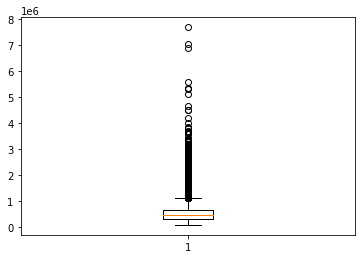

In [148]:
# Checking for outliers in the price column using boxplots
plt.boxplot(house['price'])
plt.show()

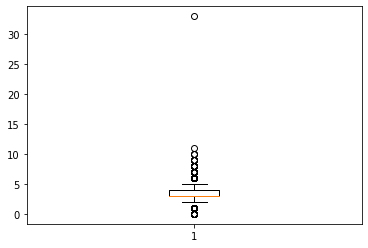

In [149]:
# checking for outliers in the bedrooms column using boxplots
plt.boxplot(house['bedrooms'])
plt.show()

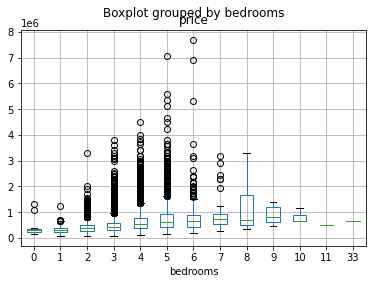

In [150]:
house.boxplot(column='price', by='bedrooms')

In [151]:
# removing outliers

z = np.abs(stats.zscore(house))

house_df = house[(z < 3).all(axis=1)]

print('Dataset with outliers', house.shape)
print('Dataset without outliers', house_df.shape)

Dataset with outliers (21613, 20)
Dataset without outliers (18702, 20)


In [152]:
# Identifying the Missing Data
#
house_df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [153]:
# More data cleaning procedures
#
house_df.duplicated().sum()

2

In [154]:
house_df.drop_duplicates(inplace=True)
print(house_df.duplicated().sum())

0


## 6. Exploratory Analysis

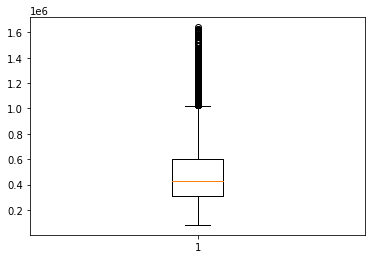

In [155]:
# Ploting the univariate summaries and recording our observations
#
plt.boxplot(house_df['price'])
plt.show()

**We can see that the outliers have reduced. Therefore we can assume that this data is good enough**

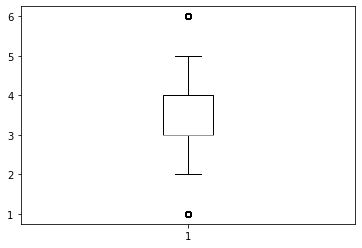

In [156]:
plt.boxplot(house_df['bedrooms'])
plt.show()

**The huge outlier was the data point with 33 bedrooms. We assume that it was a mistake considering it was too far from the rest of the data points. From this boxplot we see that it has been removed**

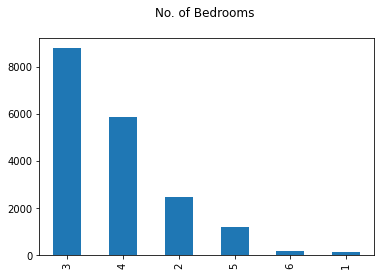

In [157]:
house_df['bedrooms'].value_counts().plot.bar(title='No. of Bedrooms \n')

** 3 bedroomed residentials seem to be the most in Kenya**

In [158]:
house_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
#plt.subplots(figsize=(20,15))
#sns.heatmap()

In [160]:
house_df['price'].mean()

480949.37962566846

## Multicolinearity

In [161]:
# we excluded waterfront and yearof renovation columns because they were giving null values

independent_corr1 = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement',
        'yr_built', 'zipcode', 'lat', 'long','sqft_living15',
         'sqft_lot15']].corr()
independent_corr1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.488936,0.608989,0.112728,0.160546,0.038684,0.023214,0.334305,0.485852,0.272413,0.176868,-0.179377,-0.042531,0.184070,0.407067,0.114411
bathrooms,0.488936,1.000000,0.711358,0.063386,0.519367,0.066410,-0.145599,0.619044,0.632672,0.199120,0.585972,-0.232357,-0.005694,0.288834,0.537757,0.066972
sqft_living,0.608989,0.711358,1.000000,0.231021,0.356824,0.122604,-0.074782,0.711347,0.857320,0.338528,0.371124,-0.228532,0.029259,0.317487,0.750160,0.234743
sqft_lot,0.112728,0.063386,0.231021,1.000000,-0.101730,0.031274,0.045786,0.142619,0.212990,0.050915,0.023067,-0.180437,-0.052453,0.272173,0.269967,0.817125
floors,0.160546,0.519367,0.356824,-0.101730,1.000000,-0.016567,-0.288838,0.473657,0.538064,-0.303547,0.537953,-0.068750,0.036622,0.153597,0.279987,-0.104930
view,0.038684,0.066410,0.122604,0.031274,-0.016567,1.000000,0.033750,0.106621,0.041749,0.157322,-0.060446,0.083978,0.009822,-0.077278,0.142537,0.018078
condition,0.023214,-0.145599,-0.074782,0.045786,-0.288838,0.033750,1.000000,-0.182750,-0.184518,0.194770,-0.399093,-0.000447,-0.008244,-0.100900,-0.119170,0.053807
grade,0.334305,0.619044,0.711347,0.142619,0.473657,0.106621,-0.182750,1.000000,0.716105,0.046594,0.499213,-0.200103,0.102835,0.253638,0.676104,0.157701
sqft_above,0.485852,0.632672,0.857320,0.212990,0.538064,0.041749,-0.184518,0.716105,1.000000,-0.194163,0.474050,-0.288846,-0.029609,0.420450,0.731724,0.222116
sqft_basement,0.272413,0.199120,0.338528,0.050915,-0.303547,0.157322,0.194770,0.046594,-0.194163,1.000000,-0.159289,0.092483,0.109878,-0.163525,0.092005,0.041326


In [162]:
pd.DataFrame(np.linalg.inv(independent_corr1.values), index = independent_corr1.index, columns=independent_corr1.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.715620,-0.378646,-8.709448e-01,0.039175,0.089044,0.058901,-0.038941,0.288770,-2.493568e-01,-1.332351e-01,0.139064,0.094525,0.068737,0.025546,0.071368,0.013863
bathrooms,-0.378646,3.121655,-1.410414e+00,0.033728,-0.719756,-0.034966,-0.178406,-0.207940,3.542076e-01,-3.067232e-01,-1.015895,0.054823,-0.031561,-0.007922,-0.026063,0.103250
sqft_living,-0.870312,-1.413710,-1.939720e+13,-0.326316,0.363565,-0.415186,-1.036158,-0.679464,1.860601e+13,1.017910e+13,0.044740,-0.192422,-0.145496,0.214604,-1.082939,0.131757
sqft_lot,0.039175,0.033728,-3.257260e-01,3.049801,0.091445,-0.037883,0.035874,0.015989,4.421465e-02,6.705434e-02,0.101205,0.041159,0.031474,-0.059087,0.044817,-2.419000
floors,0.089044,-0.719756,3.633096e-01,0.091445,2.204571,-0.013417,0.090672,-0.239037,-9.844930e-01,4.115071e-01,-0.500276,-0.167803,-0.142073,0.184997,0.293806,0.180872
view,0.058901,-0.034966,-4.154339e-01,-0.037883,-0.013417,1.076588,-0.005669,-0.088745,4.507531e-01,1.001836e-01,0.111807,-0.094059,0.073516,0.062074,-0.221470,0.040873
condition,-0.038941,-0.178406,-1.035529e+00,0.035874,0.090672,-0.005669,1.273299,-0.035028,1.021085e+00,4.360676e-01,0.597905,0.162090,0.057846,-0.035431,0.116673,-0.083101
grade,0.288770,-0.207940,-6.839264e-01,0.015989,-0.239037,-0.088745,-0.035028,2.914574,-6.603978e-01,-5.332098e-02,-0.622098,0.096078,-0.325245,0.404494,-0.792604,-0.062502
sqft_above,-0.248960,0.354707,1.860601e+13,0.044653,-0.985263,0.450588,1.021742,-0.664844,-1.784709e+13,-9.763902e+12,0.387495,0.054477,0.317953,-0.574794,-0.631878,-0.158298
sqft_basement,-0.132883,-0.307833,1.017910e+13,0.067494,0.411991,0.099949,0.436305,-0.055311,-9.763902e+12,-5.341698e+12,0.207696,-0.006664,-0.016181,0.069031,0.055269,-0.061300


In [163]:
# we dropped the sqft_above column to see whether the coliniearity will reduce
independent_corr2 = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above','yr_built', 'zipcode', 
       'lat', 'long','sqft_living15','sqft_lot15']].corr()
independent_corr2


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.488936,0.608989,0.112728,0.160546,0.038684,0.023214,0.334305,0.485852,0.176868,-0.179377,-0.042531,0.184070,0.407067,0.114411
bathrooms,0.488936,1.000000,0.711358,0.063386,0.519367,0.066410,-0.145599,0.619044,0.632672,0.585972,-0.232357,-0.005694,0.288834,0.537757,0.066972
sqft_living,0.608989,0.711358,1.000000,0.231021,0.356824,0.122604,-0.074782,0.711347,0.857320,0.371124,-0.228532,0.029259,0.317487,0.750160,0.234743
sqft_lot,0.112728,0.063386,0.231021,1.000000,-0.101730,0.031274,0.045786,0.142619,0.212990,0.023067,-0.180437,-0.052453,0.272173,0.269967,0.817125
floors,0.160546,0.519367,0.356824,-0.101730,1.000000,-0.016567,-0.288838,0.473657,0.538064,0.537953,-0.068750,0.036622,0.153597,0.279987,-0.104930
view,0.038684,0.066410,0.122604,0.031274,-0.016567,1.000000,0.033750,0.106621,0.041749,-0.060446,0.083978,0.009822,-0.077278,0.142537,0.018078
condition,0.023214,-0.145599,-0.074782,0.045786,-0.288838,0.033750,1.000000,-0.182750,-0.184518,-0.399093,-0.000447,-0.008244,-0.100900,-0.119170,0.053807
grade,0.334305,0.619044,0.711347,0.142619,0.473657,0.106621,-0.182750,1.000000,0.716105,0.499213,-0.200103,0.102835,0.253638,0.676104,0.157701
sqft_above,0.485852,0.632672,0.857320,0.212990,0.538064,0.041749,-0.184518,0.716105,1.000000,0.474050,-0.288846,-0.029609,0.420450,0.731724,0.222116
yr_built,0.176868,0.585972,0.371124,0.023067,0.537953,-0.060446,-0.399093,0.499213,0.474050,1.000000,-0.339405,-0.154618,0.427794,0.356720,0.043233


In [164]:
pd.DataFrame(np.linalg.inv(independent_corr2.values), index = independent_corr2.index, columns=independent_corr2.columns)

# The colinearity has now increased in most of the columns therefore we will refrain from dropping the sqft_above column

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.715620,-0.378646,-1.123533,0.039175,0.089044,0.058901,-0.038941,0.288770,-0.006068,0.139064,0.094525,0.068737,0.025546,0.071368,0.013863
bathrooms,-0.378646,3.121655,-2.000315,0.033728,-0.719756,-0.034966,-0.178406,-0.207940,0.917385,-1.015895,0.054823,-0.031561,-0.007922,-0.026063,0.103250
sqft_living,-1.123533,-2.000315,7.396953,-0.197699,1.148653,-0.224723,-0.204739,-0.784864,-4.279242,0.440522,-0.205121,-0.176331,0.346150,-0.977618,0.014944
sqft_lot,0.039175,0.033728,-0.197699,3.049801,0.091445,-0.037883,0.035874,0.015989,-0.078718,0.101205,0.041159,0.031474,-0.059087,0.044817,-2.419000
floors,0.089044,-0.719756,1.148653,0.091445,2.204571,-0.013417,0.090672,-0.239037,-1.738327,-0.500276,-0.167803,-0.142073,0.184997,0.293806,0.180872
view,0.058901,-0.034966,-0.224723,-0.037883,-0.013417,1.076588,-0.005669,-0.088745,0.267894,0.111807,-0.094059,0.073516,0.062074,-0.221470,0.040873
condition,-0.038941,-0.178406,-0.204739,0.035874,0.090672,-0.005669,1.273299,-0.035028,0.224236,0.597905,0.162090,0.057846,-0.035431,0.116673,-0.083101
grade,0.288770,-0.207940,-0.784864,0.015989,-0.239037,-0.088745,-0.035028,2.914574,-0.563744,-0.622098,0.096078,-0.325245,0.404494,-0.792604,-0.062502
sqft_above,-0.006068,0.917385,-4.279242,-0.078718,-1.738327,0.267894,0.224236,-0.563744,6.344311,0.007856,0.066659,0.347530,-0.700974,-0.732903,-0.046250
yr_built,0.139064,-1.015895,0.440522,0.101205,-0.500276,0.111807,0.597905,-0.622098,0.007856,2.546794,0.223748,0.333441,-0.562838,0.138746,-0.041763


## 7. Implementing the Solution

### Multilinear & Lasso Regression

In [0]:
# Creating the features to be used in the model

X = house_df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']].values
y = house_df['price'].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [166]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso RMSE: ", np.sqrt(mean_squared_error(y, lasso.predict(X))))
print("lasso coef:", lasso.coef_)

lasso score: 0.6792510799816498
lasso MSE: 17178997146.743687
lasso RMSE:  131068.67339964835
lasso coef: [-12192.78585149  19089.65331429 133179.43275683   3133.67182719
  16382.6310969   15507.66453765  18766.62603993  87585.10157106
 -57016.99003663 -34310.52403951 -63209.6713547       0.
 -17567.57661622  79576.0718123  -12348.15189675  26182.42151222
 -12140.96665904]


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 11.0}
lasso score: 0.681874108208521
linear score: 0.6818708961984455
lasso MSE: 17617622405.209465
linear MSE: 17617800284.414307
lasso best estimator coef: [-12168.0652704   17269.73933661 109509.43812509   3098.1403826
  18057.1591469   15920.67144231  18552.57179102  86217.97652853
 -35286.76585173 -21926.19429914 -63469.44064587      0.
 -17093.16056338  79454.89283547 -11933.40046214  27949.44130136
 -12622.35750821]
linear coef: [-1.21788603e+04  1.73339916e+04  3.89316275e+04  3.14589679e+03
  1.80598759e+04  1.59262982e+04  1.85639534e+04  8.61969923e+04
  3.23466553e+04  1.50624834e+04 -6.34947031e+04 -1.45519152e-11
 -1.71216661e+04  7.94697148e+04 -1.19619124e+04  2.80093849e+04
 -1.26690475e+04]


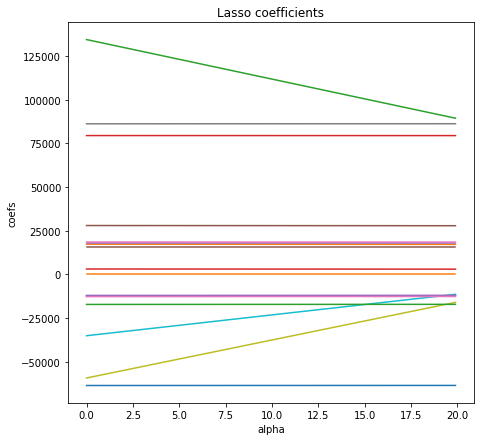

In [168]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

**We can see most of the values are being reduced to zero, but only one of the turned into a zero. The year renovated column has become zero meaning it has no effect on determining the price of the house**

### Quantile Regression

In [169]:
liv = house_df['sqft_living'].values
y = house_df['price'].values

model = smf.quantreg('y ~ liv', house_df)

res = model.fit()

print(res.summary())
print("*****************************************************************")
print(res.params)



                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2014
Model:                       QuantReg   Bandwidth:                   3.138e+04
Method:                 Least Squares   Sparsity:                    4.635e+05
Date:                Sun, 07 Jun 2020   No. Observations:                18700
Time:                        13:59:30   Df Residuals:                    18698
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    9.78e+04   4786.210     20.433      0.000    8.84e+04    1.07e+05
liv          187.5926      2.297     81.685      0.000     183.091     192.094

The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


### Ridge Regression


In [171]:
# cross validation to find the best parameters to use
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X,y)
print(search.best_params_)
abs(search.best_score_) 

{'alpha': 0.01}


17370305199.12654

In [172]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
ridge_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(ridge_model)

17182143469.3255


### Elastic Regression

In [173]:
# cross validation to find the best parameters to use
elastic=ElasticNet(normalize=True)
search1=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search1.fit(X,y)
print(search1.best_params_)
abs(search1.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


17388209967.006035

In [174]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
elastic_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(elastic_model)

17217869981.979385


### Heteroskedasticity

In [175]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residual_linear = np.subtract(linear.predict(X_test), y_test)

residual_lasso = np.subtract(gridlasso.predict(X_test), y_test)

residual_ridge = np.subtract(ridge.predict(X_test), y_test)

residual_elastic = np.subtract(elastic.predict(X_test), y_test)


# Let's find out the mean of our models residuals:

print('linear residual:', residual_linear.mean())
print('lasso residual:', residual_lasso.mean())
print('ridge residual:', residual_ridge.mean())
print('elastic residual:', residual_elastic.mean())


linear residual: -4565.009965483559
lasso residual: -4564.962245028195
ridge residual: -3396.9966052928844
elastic residual: -3260.707800840972


In [176]:
test_result, p_value = sp.stats.bartlett(linear.predict(X_test), residual_linear)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(linear.predict(X_test))-1
probability = 1 - p_value
print('Linear model')
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

Linear model
inf
the variances are homogeneous!


In [177]:
test_result, p_value = sp.stats.bartlett(lasso.predict(X_test), residual_lasso)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(lasso.predict(X_test))-1
probability = 1 - p_value
print('Lasso model')
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

Lasso model
inf
the variances are homogeneous!


In [178]:
test_result, p_value = sp.stats.bartlett(ridge.predict(X_test), residual_ridge)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(ridge.predict(X_test))-1
probability = 1 - p_value
print('Ridge model')
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

Ridge model
inf
the variances are homogeneous!


In [179]:
test_result, p_value = sp.stats.bartlett(elastic.predict(X_test), residual_elastic)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(elastic.predict(X_test))-1
probability = 1 - p_value
print('Elastic model')
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

Elastic model
inf
the variances are homogeneous!


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
# After trying a total of five models on the data we can see the best model is ridge regression model
# This is because it has the lowest MSE score

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

YES

### b). Do we need other data to answer our question?

No. I believe this data is sufficient

### c). Did we have the right question?

Yes